## NeuralNetwork.py
Se utiliza el código que el profesor subió a material docente

In [103]:
# We reuse the code that we got from the teaching staff

import numpy as np
import matplotlib.pyplot as plt
def sigmoid(z):
	return 1/(1 + np.exp(-z))

# Produce a neural network randomly initialized
def initialize_parameters(n_x, n_h, n_y):
	W1 = np.random.randn(n_h, n_x)
	b1 = np.zeros((n_h, 1))
	W2 = np.random.randn(n_y, n_h)
	b2 = np.zeros((n_y, 1))

	parameters = {
	"W1": W1,
	"b1" : b1,
	"W2": W2,
	"b2" : b2
	}
	return parameters

# Evaluate the neural network
def forward_prop(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  # Z value for Layer 1
  Z1 = np.dot(W1, X) + b1
  # Activation value for Layer 1
  A1 = np.tanh(Z1)
  # Z value for Layer 2
  Z2 = np.dot(W2, A1) + b2
  # Activation value for Layer 2
  A2 = sigmoid(Z2)

  cache = {
    "A1": A1,
    "A2": A2
  }
  return A2, cache

# Evaluate the error (i.e., cost) between the prediction made in A2 and the provided labels Y 
# We use the Mean Square Error cost function
def calculate_cost(A2, Y):
  # m is the number of examples
  cost = np.sum((0.5 * (A2 - Y) ** 2).mean(axis=1))/m
  return cost

# Apply the backpropagation
def backward_prop(X, Y, cache, parameters):
  A1 = cache["A1"]
  A2 = cache["A2"]

  W2 = parameters["W2"]

  # Compute the difference between the predicted value and the real values
  dZ2 = A2 - Y
  dW2 = np.dot(dZ2, A1.T)/m
  db2 = np.sum(dZ2, axis=1, keepdims=True)/m
  # Because d/dx tanh(x) = 1 - tanh^2(x)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
  dW1 = np.dot(dZ1, X.T)/m
  db1 = np.sum(dZ1, axis=1, keepdims=True)/m

  grads = {
    "dW1": dW1,
    "db1": db1,
    "dW2": dW2,
    "db2": db2
  }

  return grads

# Third phase of the learning algorithm: update the weights and bias
def update_parameters(parameters, grads, learning_rate):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  W1 = W1 - learning_rate*dW1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2
  
  new_parameters = {
    "W1": W1,
    "W2": W2,
    "b1" : b1,
    "b2" : b2
  }

  return new_parameters

# model is the main function to train a model
# X: is the set of training inputs
# Y: is the set of training outputs
# n_x: number of inputs (this value impacts how X is shaped)
# n_h: number of neurons in the hidden layer
# n_y: number of neurons in the output layer (this value impacts how Y is shaped)
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
  c=[]
  ite=[]
  parameters = initialize_parameters(n_x, n_h, n_y)
  for i in range(0, num_of_iters+1):
    a2, cache = forward_prop(X, parameters)
    cost = calculate_cost(a2, Y)
    c.append(cost)
    ite.append(i)
    grads = backward_prop(X, Y, cache, parameters)
    parameters = update_parameters(parameters, grads, learning_rate)
    #if(i%100 == 0):
      #print('Cost after iteration# {:d}: {:f}'.format(i, cost))
  # Plot Loss function
  plt.figure(figsize = (14,7))
  plt.plot(ite,c)
  plt.title("Cost during Training")
  plt.xlabel("Iterations")
  plt.ylabel("Cost")
  return parameters

# Make a prediction
# X: represents the inputs
# parameters: represents a model
# the result is the prediction
def predict(X, parameters):
  a2, cache = forward_prop(X, parameters)
  yhat = a2
  yhat = np.squeeze(yhat)
  answer=np.zeros(len(yhat))
  pos=1
  maximo=0
  for i in range(len(yhat)):
        if(yhat[i]>= maximo): 
            maximo=yhat[i]
            pos=i
  answer[pos]=1
  return answer

## Pick one dataset
Por el momento se escoge el iris dataset por su simplicidad

In [104]:
# We open the data from 'iris.data', and it is resize to get
# the instances in its row, and atributes in the column
iris_f=open("iris.data", "r").read().replace('\t',',').replace('\n',',').split(',')
iris=np.resize(np.array(iris_f),(int(len(iris_f)/5),5))


# We save the variables of the output and input in new variables
Y=iris[:, 4].astype(str)
X=np.delete(iris,4,1).astype(float)
m = X.shape[0]
m

150

## Implement the one hot encoding transformation

In [114]:
# oneHotEncoding transform the output into a binary code, with just only one value diferent of zero 
# outputs: is the output that we get from the dataset
def oneHotEncoding(outputs):
    out=[]
    for i in outputs:
        if(i=="Iris-setosa"):
            pro=[0,0,1]
            
        if(i=="Iris-versicolor"):
            pro=[0,1,0]
            
        if(i=="Iris-virginica"):
            pro=[1,0,0]
        
        out.append(pro)
    return np.array(out)

##  Implement the normalization
Se define una función auxiliar normalizar, para después aplicarla a los datos

In [115]:
# norm normalize the input from the dataset and return a new matriz
# data: is the input from the dataser
# length: is the amount of atributes of the input or data
# low: is the smaller value that we want in our new data
# high: is the highest value that we want in our new data
def norm(data,length,low,high):
    newData=np.zeros((len(data),length))
    for i in range(length):
        dMax=np.max(data[:,i])
        dMin=np.min(data[:,i])
        for j in range(len(data[:,i])):
            newData[:,i][j]=((data[:,i][j]-dMin)*(high-low))/(dMax-dMin)+low
    return newData

In [116]:
# Here we separate the normalize data into a train group and a test group
# we import the sklearn library, to separate the data in a desire percentage
from sklearn.model_selection import train_test_split

# First we normalize the input
Xnom=norm(X,4,0,1)
# And encode the output
Ynom=oneHotEncoding(Y)
x_train, x_test, y_train, y_test = train_test_split(Xnom, Ynom, test_size=0.30)

# Here we transform the test input to work with de function due the structure that this have
# We only makes vectors all the values of the matrix
x_test_real=[]
for i in x_test:
    xx=[]
    for j in i:
        oo=[]
        oo.append(j)
        xx.append(oo)
    x_test_real.append(xx)

##  Implement a way to chart the cost functions during the training
Durante el enternamiento se van guardando los costos en una lista, cuando este termina se grafican los resultados

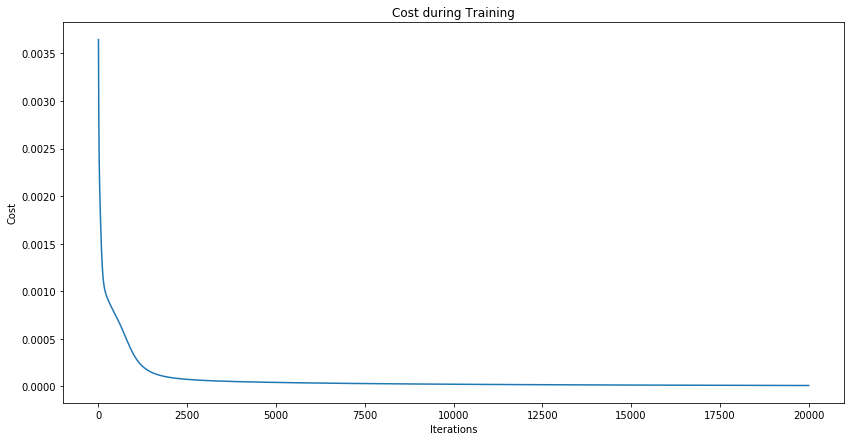

In [117]:
# In this part we train the parameters and plot the chart
trained_parameters_model = model(np.transpose(x_train), np.transpose(y_train), 4, 5, 3, 20000, 0.1)
plt.savefig('./Cost.png')

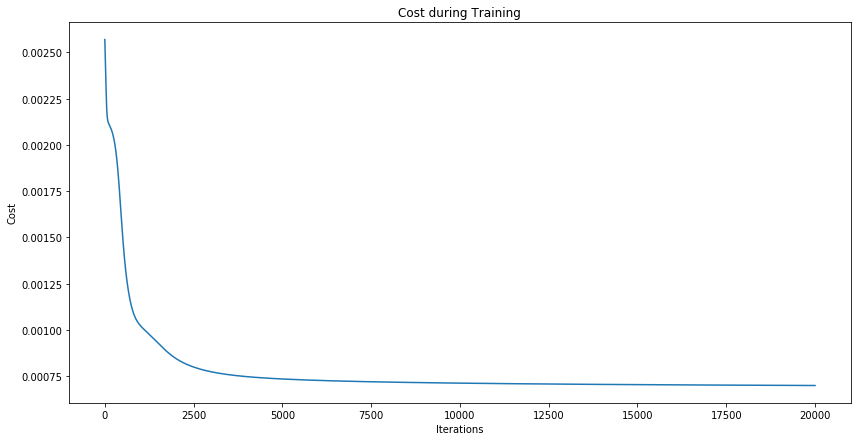

In [118]:
# We use other hiper-parameters
trained_parameters_model2 = model(np.transpose(x_train), np.transpose(y_train), 4, 1, 3, 20000, 0.1)
plt.savefig('./Cost.png')

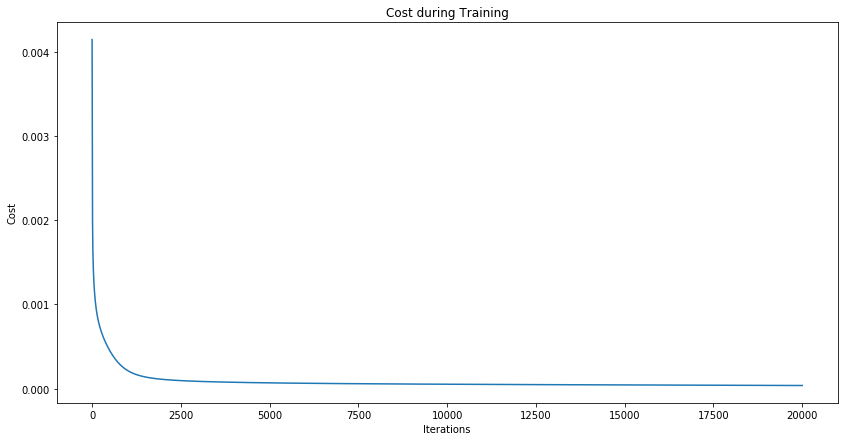

In [110]:
# We use other hiper-parameters
trained_parameters_model3 = model(np.transpose(x_train), np.transpose(y_train), 4, 10, 3, 20000, 0.1)
plt.savefig('./Cost.png')

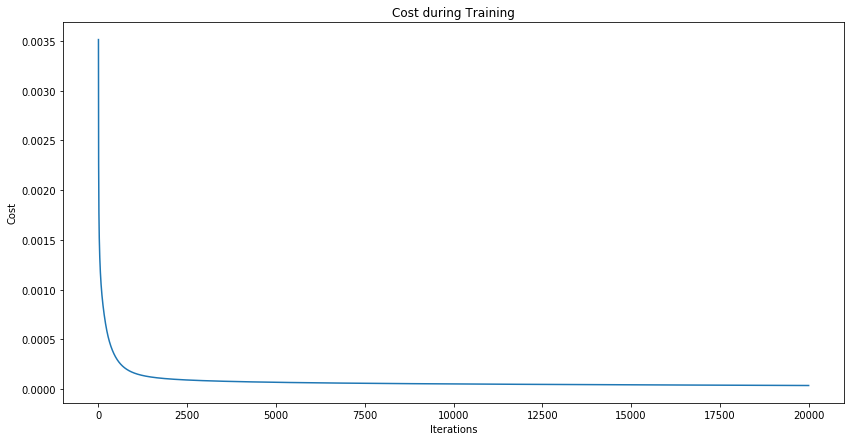

In [111]:
# We use other hiper-parameters
trained_parameters_model4 = model(np.transpose(x_train), np.transpose(y_train), 4, 20, 3, 20000, 0.1)
plt.savefig('./Cost.png')

In [112]:
# Here we save the prediction of the test input
y_predicted=[]
for i in x_test_real:
    y_predicted.append(predict(i,trained_parameters_model))

y_predicted2=[]
for i in x_test_real:
    y_predicted2.append(predict(i,trained_parameters_model2))  
    
y_predicted3=[]
for i in x_test_real:
    y_predicted3.append(predict(i,trained_parameters_model3))  
    
y_predicted4=[]
for i in x_test_real:
    y_predicted4.append(predict(i,trained_parameters_model4))  

In [113]:
# From sklearn we get a function to get the precision and in this way we can see
# the performance of our trained parametres
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_predicted)
average_precision2 = average_precision_score(y_test, y_predicted2)
average_precision3 = average_precision_score(y_test, y_predicted3)
average_precision4 = average_precision_score(y_test, y_predicted4)
print(f"average precission using 5 hidden layers = {average_precision}")
print(f"average precission using 1 hidden layers = {average_precision2}")
print(f"average precission using 10 hidden layers = {average_precision3}")
print(f"average precission using 20 hidden layers = {average_precision4}")

average precission using 5 hidden layers = 0.9097643097643098
average precission using 1 hidden layers = 0.9076539104511133
average precission using 10 hidden layers = 0.9097643097643098
average precission using 20 hidden layers = 0.9097643097643098


In [98]:
#In this part we see the real amount of each class

first=0
second=0
third=0

for i in y_test:
    if i[0]==1:
        first+=1
    if i[1]==1:
        second+=1
    if i[2]==1:
        third+=1
    
print(f"Total de clases en test  'Iris-setosa'={first}, 'Iris-versicolor'={second}, 'Iris-virginica'={third}")

Total de clases en test  'Iris-setosa'=19, 'Iris-versicolor'=14, 'Iris-virginica'=12


In [99]:
# Here we get the true positive of the prediction

TPise=0
TPive=0
TPivi=0
length=len(y_test)
for i in range(length):
    if (y_test[i]==y_predicted[i]).all() and (y_test[i]==[1,0,0]).all():
        TPise+=1
        
    if (y_test[i]==y_predicted[i]).all() and (y_test[i]==[0,1,0]).all():
        TPive+=1
        
    if (y_test[i]==y_predicted[i]).all() and (y_test[i]==[0,0,1]).all():
        TPivi+=1
    
    


In [100]:
# Here we get the false positive of the prediction

FPise_ive=0
FPise_ivi=0
FPive_ise=0
FPive_ivi=0
FPivi_ise=0
FPivi_ive=0
for i in range(length):
    if (y_predicted[i]==[1,0,0]).all() and (y_test[i]==[0,1,0]).all():
        FPise_ive+=1
        
    if (y_predicted[i]==[1,0,0]).all() and (y_test[i]==[0,0,1]).all():
        FPise_ivi+=1
        
    if (y_predicted[i]==[0,1,0]).all() and (y_test[i]==[1,0,0]).all():
        FPive_ise+=1
        
    if (y_predicted[i]==[0,1,0]).all() and (y_test[i]==[0,0,1]).all():
        FPive_ivi+=1
        
    if (y_predicted[i]==[0,0,1]).all() and (y_test[i]==[1,0,0]).all():
        FPivi_ise+=1
        
    if (y_predicted[i]==[0,0,1]).all() and (y_test[i]==[0,1,0]).all():
        FPivi_ive+=1

        
# We get the total amount of the prediction of each class
totalPise=TPise+FPise_ive+FPise_ivi
totalPive=TPive+FPive_ise+FPive_ivi
totalPivi=TPivi+FPivi_ise+FPivi_ive
total=first+second+third

In [101]:
#And finally, we print the confusion matrix of our model

print("Predicted\\real  | Iris-setosa | Iris-versicolor | Iris-virginica | Total predicho" )
print("---------------------------------------------------------------------------------")
print(f"Iris-setosa     |    {TPise}       |        {FPise_ive}        |       {FPise_ivi}        |        {totalPise}")
print("---------------------------------------------------------------------------------")
print(f"Iris-versicolor |    {FPive_ise}       |        {TPive}        |       {FPive_ivi}        |        {totalPive}")
print("---------------------------------------------------------------------------------")
print(f"Iris-virginica  |    {FPivi_ise}       |        {FPivi_ive}        |       {TPivi}       |        {totalPivi}")
print("---------------------------------------------------------------------------------")
print(f"Total Real      |    {first}       |        {second}        |       {third}       |        {total}")

Predicted\real  | Iris-setosa | Iris-versicolor | Iris-virginica | Total predicho
---------------------------------------------------------------------------------
Iris-setosa     |    19       |        0        |       0        |        19
---------------------------------------------------------------------------------
Iris-versicolor |    0       |        14        |       0        |        14
---------------------------------------------------------------------------------
Iris-virginica  |    0       |        0        |       12       |        12
---------------------------------------------------------------------------------
Total Real      |    19       |        14        |       12       |        45
